## Iris Flower Dataset

### About Dataset
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

#### The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

In [2]:
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Read data
iris = pd.read_csv("../data/raw/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [6]:
## Null Values
pd.isnull(iris).sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

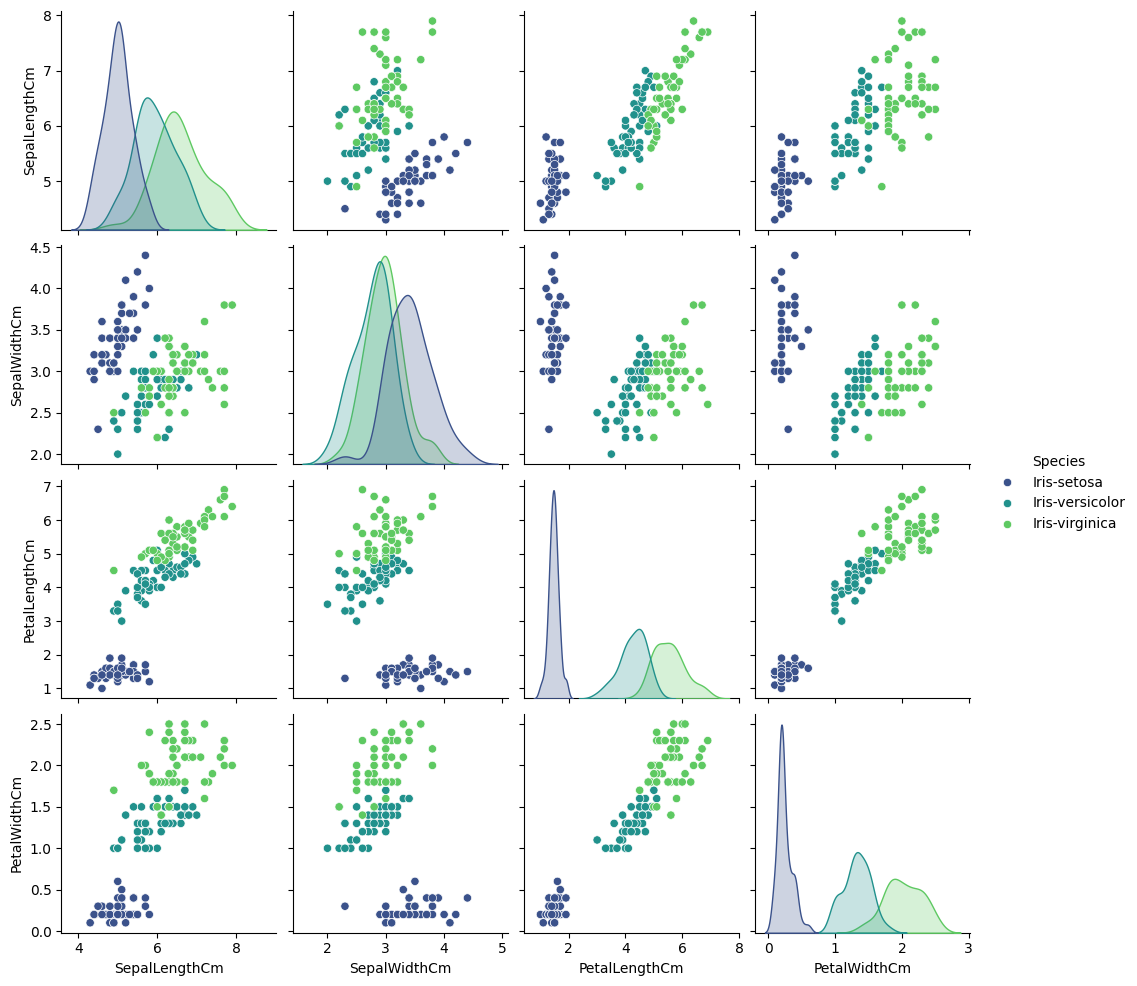

In [7]:
## Data Distribution and Releationship with Pairplot
sns.pairplot(iris.drop("Id",axis=1),hue="Species",palette="viridis")
plt.show()

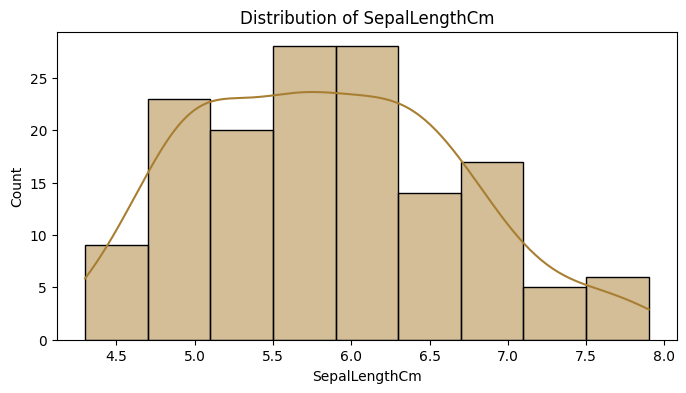

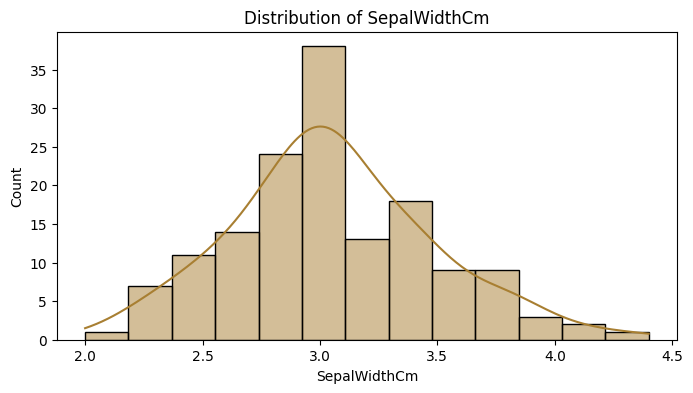

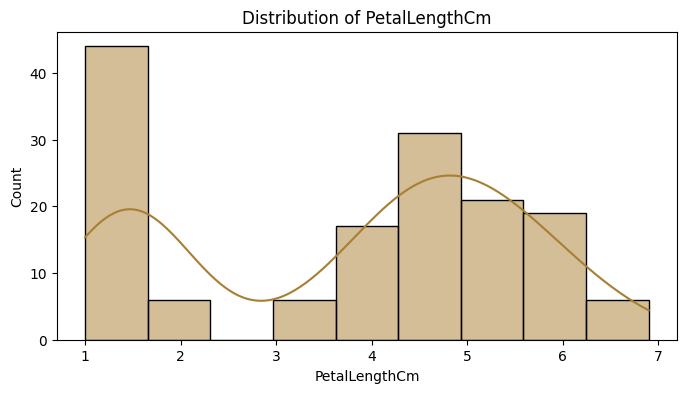

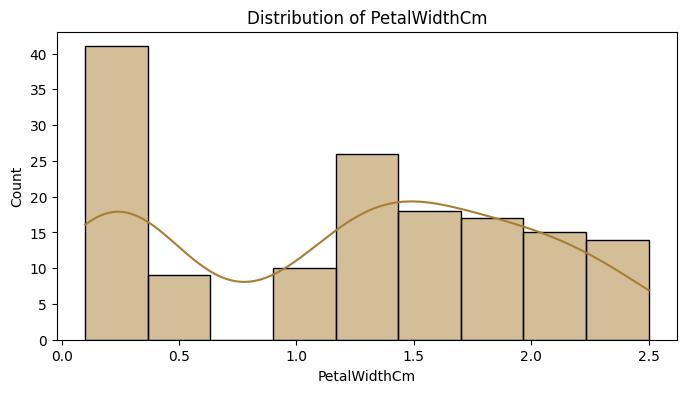

In [8]:
## Distribution of the Numerical features
numerical_feature = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for feat in numerical_feature:
    plt.figure(figsize=(8,4))
    sns.histplot(iris[feat],color='#a87f32',kde=True)
    plt.title(f"Distribution of {feat}")
    plt.show() 

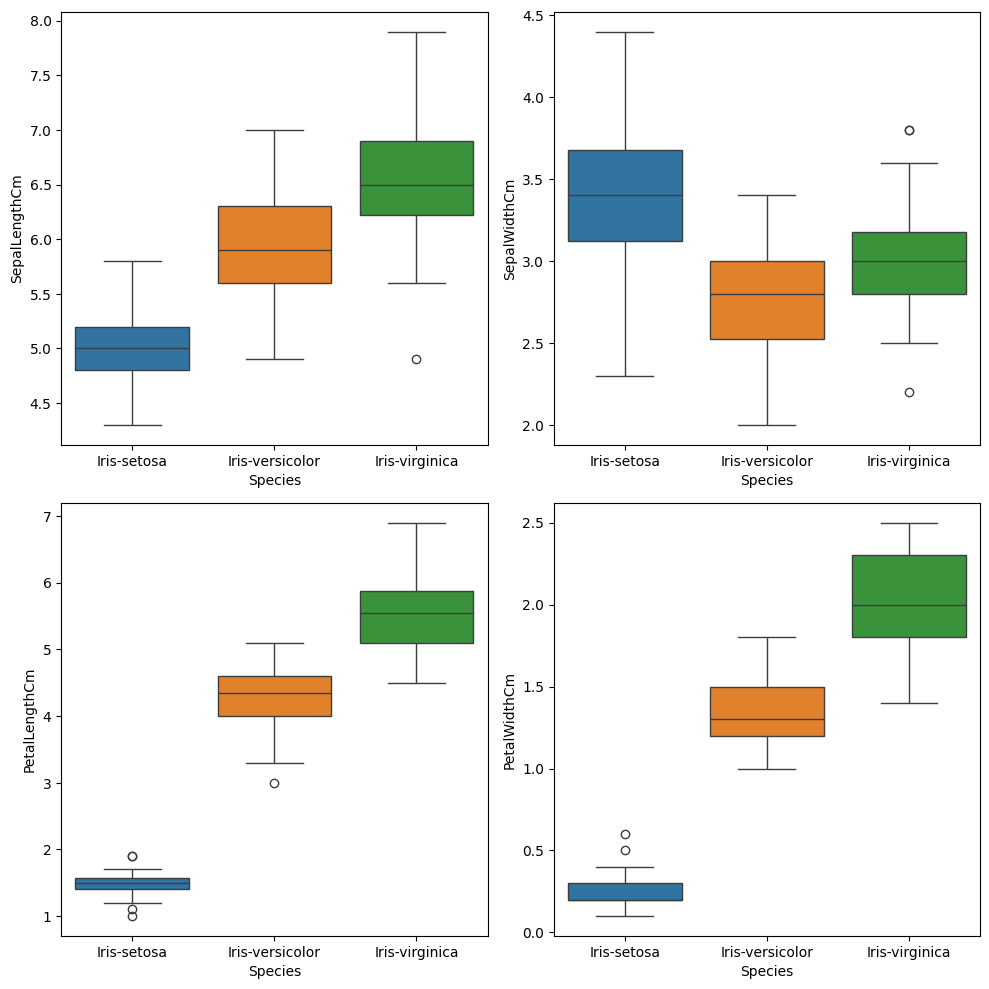

In [9]:
## Comparing the distribution of the features across species using boxplots
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,10))
sns.boxplot(data=iris,x="Species",y="SepalLengthCm",hue="Species",ax=ax1)
sns.boxplot(data=iris,x="Species",y="SepalWidthCm",hue="Species",ax=ax2)
sns.boxplot(data=iris,x="Species",y="PetalLengthCm",hue="Species",ax=ax3)
sns.boxplot(data=iris,x="Species",y="PetalWidthCm",hue="Species",ax=ax4)
plt.tight_layout()
plt.show()
    

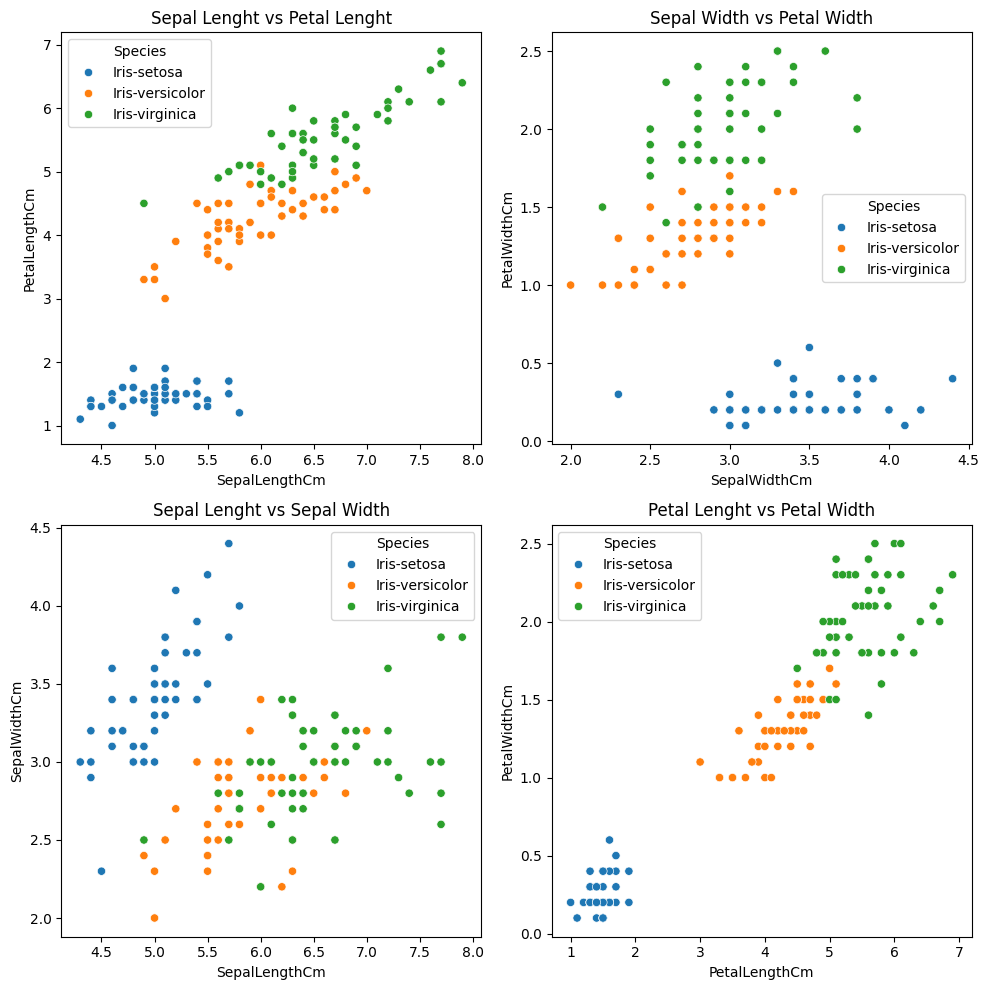

In [10]:
## Seperation of Datapoints
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,10))
sns.scatterplot(data=iris,x="SepalLengthCm",y="PetalLengthCm",hue='Species',ax=ax1)
ax1.set_title("Sepal Lenght vs Petal Lenght")

sns.scatterplot(data=iris,x="SepalWidthCm",y="PetalWidthCm",hue='Species',ax=ax2)
ax2.set_title("Sepal Width vs Petal Width")

sns.scatterplot(data=iris,x="SepalLengthCm",y="SepalWidthCm",hue='Species',ax=ax3)
ax3.set_title("Sepal Lenght vs Sepal Width")

sns.scatterplot(data=iris,x="PetalLengthCm",y="PetalWidthCm",hue='Species',ax=ax4)
ax4.set_title("Petal Lenght vs Petal Width")
plt.tight_layout()
plt.show()

<Axes: >

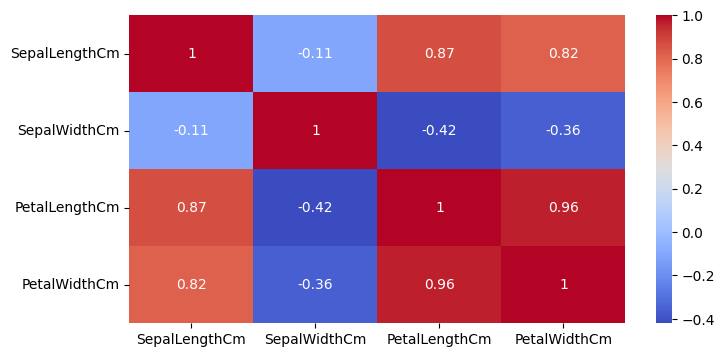

In [11]:
## Co-relation betwwen the features
corr = iris.drop('Id',axis=1).corr(numeric_only=True)
plt.figure(figsize=(8,4))
sns.heatmap(corr,cmap='coolwarm',annot=True)

In [12]:
## Predict Species
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Metrix:


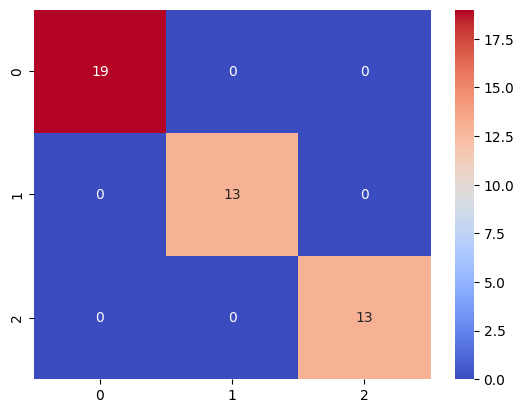

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
cr = classification_report(y_test,prediction)
cm = confusion_matrix(y_test,prediction)
print("Classification Report:")
print(cr)
print("Confusion Metrix:")
sns.heatmap(cm,annot=True,cmap="coolwarm")
plt.show()

In [14]:
## Prediction on new data
new_data = [[3.2,5,4.4,2.3]]
pred = model.predict(new_data)

In [15]:
# mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
# iris["Species"] = iris["Species"].map(mapping)


In [38]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
import streamlit as st
import joblib

print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", sns.__version__)
print("Scikit-learn:", sklearn.__version__)
print("Streamlit:", st.__version__)
print("Joblib:", joblib.__version__)

NumPy: 2.3.2
Pandas: 2.3.1
Matplotlib: 3.10.5
Seaborn: 0.13.2
Scikit-learn: 1.7.1
Streamlit: 1.48.1
Joblib: 1.5.1
